# The Wine dataset

For this experiment we are using the wine dataset which is available is scikit-learn.Here there are 3 different types of wines and each wine data point is a 13-dimensional vector each encoding different properties of the sample.

In [8]:
from sklearn.datasets import load_wine
wine_types = load_wine()
wine_types.data.shape

(178, 13)

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(wine_types.data)
print(kmeans.cluster_centers_.shape)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

 

(3, 13)


# Clustering the data

Since there are three different types of wine in this dataset we cluster them into three clusters using k_means clustering.After performing the clustering it show an accuracy score of 0.70 and average silhoutte score of 0.56.

In [3]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
#    print(mask)
#    print(mode(wine_types.target[mask])[0])
#    print(mode(wine_types.target[mask])[1])
    labels[mask] = mode(wine_types.target[mask])[0]
    
from sklearn.metrics import accuracy_score
print("Accuracy score is : " + str(accuracy_score(wine_types.target, labels)))
print('For %d clusters the average silhouette score is %f' % (3, silhouette_score(wine_types.data, kmeans.labels_)))

Accuracy score is : 0.702247191011236
For 3 clusters the average silhouette score is 0.571138


## Constructing a confusion matrix

In this step we construct a confusion matrix for the different elements of the clusters which gives us an idea about the true and predicted labels for the different data points.

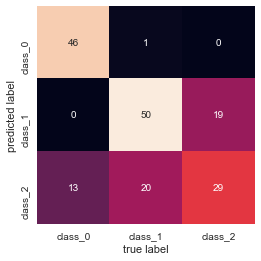

In [4]:
%matplotlib inline

from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(wine_types.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=wine_types.target_names,
            yticklabels=wine_types.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');



# Using PCA

Next we use the PCA dimension reduction technique to reduce the dimension of each vector to 2 and then perform the k_means clustering and this results in an accuracy of 0.96! The average silhoutte score becomes 0.56.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

wine_types_scaled = scaler.fit_transform(wine_types.data)

from sklearn.decomposition import PCA

"""
    pca can also be initialized as pca = pca(0.95) : fraction of variance explained
"""


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(wine_types_scaled)
                    
wine_types_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(wine_types_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(wine_types.target[mask])[0]

# Compute the accuracy
print("The accuracy score is: " + str(accuracy_score(wine_types.target, labels)))
print('For %d clusters the average silhouette score is %f' % (3, silhouette_score(wine_types_proj, kmeans.labels_)))

The accuracy score is: 0.9662921348314607
For 3 clusters the average silhouette score is 0.561051


# Using TSNE

In this step we use TSNE with 2 components.After the whole process we get an accuracy of 0.71 and average silhoutte score 0.61.

In [6]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
wine_types_proj = tsne.fit_transform(wine_types.data)

# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(wine_types_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(wine_types.target[mask])[0]

# Compute the accuracy
print("The acuracy score is: " + str(accuracy_score(wine_types.target, labels)))
print('For %d clusters the average silhouette score is %f' % (3, silhouette_score(wine_types_proj, kmeans.labels_)))



The acuracy score is: 0.7134831460674157
For 3 clusters the average silhouette score is 0.618910


# Visualizing the clusters

After performing the dimension reductions we visualize the clusters in two dimensions which results in the following diagram.

ready


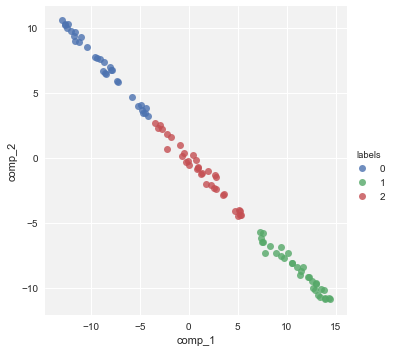

In [7]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(wine_types_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(100) ,fit_reg=False)
print("ready")
